# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
        
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
# Loop cities dataframe, pulling API data for each iteration
cities = pd.DataFrame(cities)
weatherResults = {
    'City' : [],	
    'Cloudiness' : [],	
    'Country' : [],
    'Data' : [],
    'Humidity' : [],	
    'Lat' : [],
    'Lng' : [],
    'Max Temp' : [],
    'Wind Speed' : []
}

url = "http://api.openweathermap.org/data/2.5/weather"

print("Beginning Data Retrieval")
print("-----------------------------")

loopCount = 1
for city in cities.iterrows(): 
    params = {
        "q": city[1][0],
        "appid": weather_api_key,
        "units": 'imperial',
    }

    try:
        results = requests.get(url, params=params).json()
    except:
        continue
    
    try:
        print(f"Processing Record {loopCount} of Set 1 | {city[1][0]}")
        weatherResults['City'].append(results['name'])
        weatherResults['Cloudiness'].append(results['clouds']['all'])
        weatherResults['Country'].append(results['sys']['country'])
        weatherResults['Data'].append(results['dt'])
        weatherResults['Humidity'].append(results['main']['humidity'])
        weatherResults['Lat'].append(results['coord']['lat'])
        weatherResults['Lng'].append(results['coord']['lon'])
        weatherResults['Max Temp'].append(results['main']['temp_max'])
        weatherResults['Wind Speed'].append(results['wind']['speed'])
    except KeyError:
        print(f"City: {city[1][0]} not found. Skipping.")
    
    loopCount += 1
        

    
#     weatherResults.append(results)
    time.sleep(.5)

# weatherData = pd.read_csv('C:/temp/weather_data.csv')


ord 159 of Set 1 | yerbogachen
Processing Record 160 of Set 1 | pangnirtung
Processing Record 161 of Set 1 | rio gallegos
Processing Record 162 of Set 1 | orangeville
Processing Record 163 of Set 1 | nemuro
Processing Record 164 of Set 1 | xiaoweizhai
Processing Record 165 of Set 1 | bustonkala
city: bustonkala wasn't found
Processing Record 166 of Set 1 | boa vista
Processing Record 167 of Set 1 | batemans bay
Processing Record 168 of Set 1 | tiksi
Processing Record 169 of Set 1 | okhotsk
Processing Record 170 of Set 1 | vaini
Processing Record 171 of Set 1 | tezu
Processing Record 172 of Set 1 | tabas
Processing Record 173 of Set 1 | totness
Processing Record 174 of Set 1 | luderitz
Processing Record 175 of Set 1 | saint-augustin
Processing Record 176 of Set 1 | redhakhol
city: redhakhol wasn't found
Processing Record 177 of Set 1 | bandarbeyla
Processing Record 178 of Set 1 | sinnamary
Processing Record 179 of Set 1 | lodja
Processing Record 180 of Set 1 | vilyuysk
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.

* Display the DataFrame

In [28]:
# Covert to dataframe
weatherResultsDF = pd.DataFrame(weatherResults)
# Export to CSV
weatherResultsDF.to_csv('C:/temp/weatherData.csv')
# Clean data of any rows with nulls
weatherResultsDF = weatherResultsDF.dropna(how="all")
# Display cleaned data
weatherResultsDF.head()

,City,Cloudiness,Country,Data,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Chui,0,UY,1580356966,85,-33.70,-53.46,68.76,7.09
1,Guiyang,0,CN,1580356762,75,26.58,106.72,41.00,6.71
2,Longyearbyen,20,SJ,1580356969,62,78.22,15.64,21.20,11.41
3,Northam,75,GB,1580356763,100,51.03,-4.22,48.99,9.17
4,Arrondissement de Bressuire,100,FR,1580356764,95,46.92,-0.50,48.99,17.58


#### Latitude vs. Temperature Plot

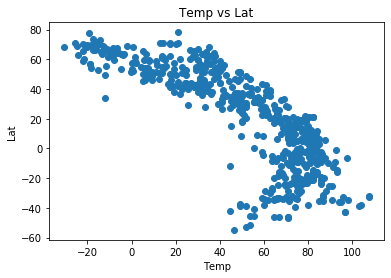

In [53]:

y = weatherResultsDF['Lat']
x = weatherResultsDF['Max Temp']
# Build and show chart
plt.scatter(x, y, marker="o")
plt.title('Temp vs Lat')
plt.xlabel('Temp')
plt.ylabel('Lat')
plt.savefig('LatVsTemp.png')



#### Latitude vs. Humidity Plot

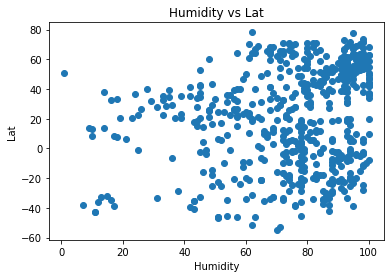

In [52]:
x = weatherResultsDF['Humidity']
y = weatherResultsDF['Lat']  

# Build and show chart   
plt.scatter(x, y, marker="o")
plt.title('Humidity vs Lat')
plt.xlabel('Humidity')
plt.ylabel('Lat')
plt.savefig('LatVsHum.png')

#### Latitude vs. Cloudiness Plot

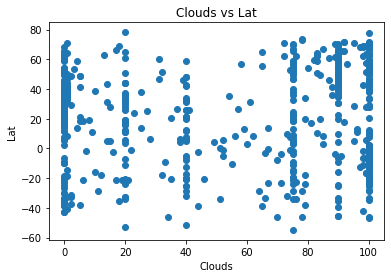

In [51]:

x = weatherResultsDF['Cloudiness']
y = weatherResultsDF['Lat']  

# Build and show chart
plt.scatter(x, y, marker="o")
plt.title('Clouds vs Lat')
plt.xlabel('Clouds')
plt.ylabel('Lat')
plt.savefig('LatVsCloud.png')

#### Latitude vs. Wind Speed Plot

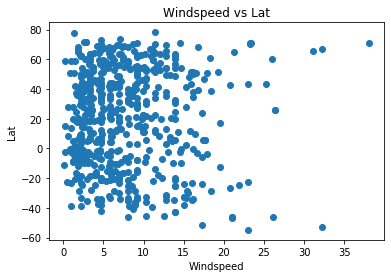

In [50]:

x = weatherResultsDF['Wind Speed']
y = weatherResultsDF['Lat']

# Build and show chart
plt.scatter(x, y, marker="o")
plt.title('Windspeed vs Lat')
plt.xlabel('Windspeed')
plt.ylabel('Lat')
plt.savefig('LatVsWind.png')

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [33]:
# Create Northern and Southern Hemisphere DataFrames

nHem = weatherResultsDF[weatherResultsDF['Lat'] >= 0]
sHem = weatherResultsDF[weatherResultsDF['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

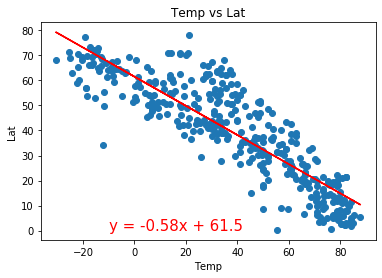

In [49]:
# Build and show chart
x = nHem['Max Temp']
y = nHem['Lat']  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, marker="o")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-10,0),fontsize=15,color="red")
plt.title('Temp vs Lat')
plt.xlabel('Temp')
plt.ylabel('Lat')
plt.savefig('NorthHemTempVsLatLR.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

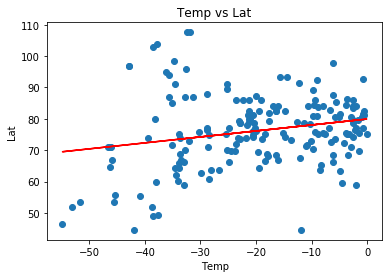

In [48]:
# Build and show chart
y = sHem['Max Temp']
x = sHem['Lat']  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, marker="o")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.title('Temp vs Lat')
plt.xlabel('Temp')
plt.ylabel('Lat')
plt.savefig('SouthHemTempVsLatLR.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

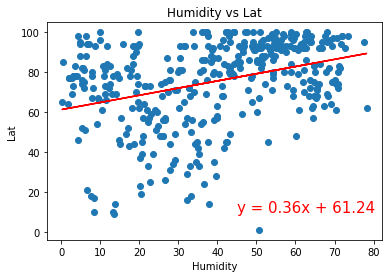

In [47]:
# Build and show chart
y = nHem['Humidity']
x = nHem['Lat']  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, marker="o")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.title('Humidity vs Lat')
plt.xlabel('Humidity')
plt.ylabel('Lat')
plt.savefig('NorthHemHumVsLatLR.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

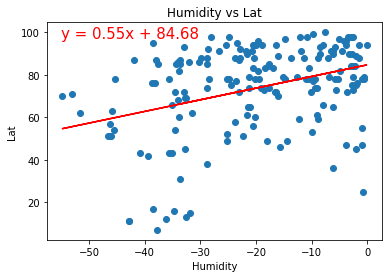

In [46]:
# Build and show chart
y = sHem['Humidity']
x = sHem['Lat']  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, marker="o")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55,97),fontsize=15,color="red")
plt.title('Humidity vs Lat')
plt.xlabel('Humidity')
plt.ylabel('Lat')
plt.savefig('SouthHemHumVsLatLR.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

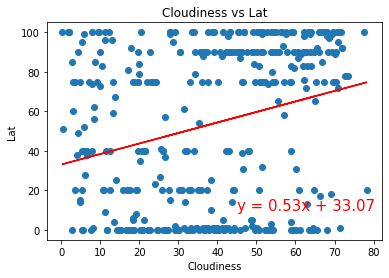

In [45]:
# Build and show chart
y = nHem['Cloudiness']
x = nHem['Lat']  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, marker="o")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.title('Cloudiness vs Lat')
plt.xlabel('Cloudiness')
plt.ylabel('Lat')
plt.savefig('NorthHemCloudVsLatLR.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

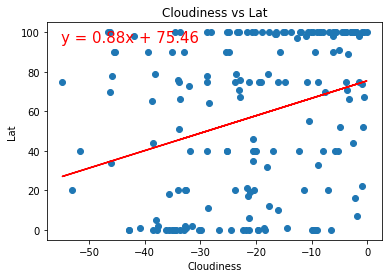

In [44]:
# Build and show chart
y = sHem['Cloudiness']
x = sHem['Lat']  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, marker="o")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55,95),fontsize=15,color="red")
plt.title('Cloudiness vs Lat')
plt.xlabel('Cloudiness')
plt.ylabel('Lat')
plt.savefig('SouthHemCloudVsLatLR.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

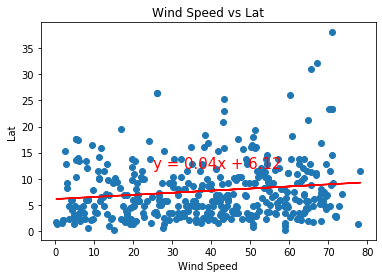

In [43]:
# Build and show chart
y = nHem['Wind Speed']
x = nHem['Lat']  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, marker="o")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(25,12),fontsize=15,color="red")
plt.title('Wind Speed vs Lat')
plt.xlabel('Wind Speed')
plt.ylabel('Lat')
plt.savefig('NorthHemWindVsLatLR.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

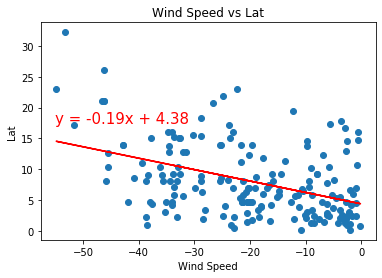

In [42]:
# Build and show chart
y = sHem['Wind Speed']
x = sHem['Lat']  
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, marker="o")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55,17.5),fontsize=15,color="red")
plt.title('Wind Speed vs Lat')
plt.xlabel('Wind Speed')
plt.ylabel('Lat')
plt.savefig('SouthHemWindVsLatLR.png')